In [37]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [38]:
#load json file
# with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_small.json") as f:
with open("ckpts/sft_bios_new_llama7B_2_2/checkpoint_20000/hf_model/factscores_test_medium.json", "r") as f:
    factscores = json.load(f)

with open("ckpts/ppo_rm_bios_llama7B_true2_false-3_kl0pt5/checkpoint_017000/hf_model/factscores_test_medium.json", "r") as f:
    factscores2 = json.load(f)

with open("ckpts/ppo_rm_bios_llama7B_true2_false-3_kl0pt5_GPT3pt5/checkpoint_006000/hf_model/factscores_test_medium.json", "r") as f:
    factscores3 = json.load(f)


generations = np.load("ckpts/sft_bios_new_llama7B_2_2/checkpoint_20000/hf_model/sample_output_strings_test_medium.npy")
generations2 = np.load("ckpts/ppo_rm_bios_llama7B_true2_false-3_kl0pt5/checkpoint_017000/hf_model/sample_output_strings_test_medium.npy")

In [8]:
len(factscores["decisions"])

5000

In [39]:

num_true_all = []
num_total_all = []
frac_correct_facts = []
num_none_decisions = 0
for i in range(len(factscores["decisions"])):
    decison = factscores["decisions"][i]
    if decison == None:
        print(generations[i])
        num_total_all.append(0)
        num_true_all.append(0)
        frac_correct_facts.append(0)
        num_none_decisions += 1

    else:
        num_total_all.append(len(decison))
        num_true_all.append(np.sum([fact["is_supported"] for fact in decison]))
        frac_correct_facts.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
num_total_all = np.array(num_total_all)
num_true_all = np.array(num_true_all)
frac_correct_facts = np.array(frac_correct_facts)
num_false_all = num_total_all - num_true_all

<unk><unk><unk><unk><unk><unk><unk> Write a biography for Madeleine Ngono Mani. Bio:  Madeleine Ngono Mani is a Cameroonian politician who served as Minister of Women's Empowerment and the Family from 2011 to 2
<unk><unk><unk><unk><unk><unk><unk> Write a biography for Robin Ward (television personality). Bio:  Robin Ward is an American television personality, best known for his role as the host of the game show The Joker's Wild from 1977 to 1
<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk> Write a biography for Raman Lamba. Bio:  Raman Lamba is an Indian former cricketer who played in 10 Tests and 12 ODIs from 1980 to 19
<unk><unk><unk><unk><unk><unk><unk> Write a biography for Ronald Verlin Cassill. Bio:  Ronald Verlin Cassill was an American politician and a Democratic member of the Wyoming House of Representatives representing District 28 from 2003 to 20
<unk><unk><unk><unk><unk><unk><unk> Write a biography for Nahum Benari. Bio:  Nahum Benari was an Israeli politician who served

In [40]:
num_true_all2 = []
num_total_all2 = []
frac_correct_facts2 = []
num_none_decisions2 = 0
for i in range(len(factscores2["decisions"])):
    decison = factscores2["decisions"][i]
    if decison == None:
        print(generations2[i])
        num_total_all2.append(0)
        num_true_all2.append(0)
        frac_correct_facts2.append(0)
        num_none_decisions2 += 1

    else:
        num_total_all2.append(len(decison))
        num_true_all2.append(np.sum([fact["is_supported"] for fact in decison]))
        frac_correct_facts2.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
num_total_all2 = np.array(num_total_all2)
num_true_all2 = np.array(num_true_all2)
frac_correct_facts2 = np.array(frac_correct_facts2)
num_false_all2 = num_total_all2 - num_true_all2

<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk> Write a biography for Justin Holiday. Bio:  Justin Holiday is an American professional basketball player who currently plays for the Golden State Warriors of the National Basketball Association.
<unk><unk><unk><unk><unk><unk><unk> Write a biography for Russ Kick. Bio:  Russ Kick is an American writer and editor.
<unk><unk><unk> Write a biography for Cynthia Lummis. Bio:  Cynthia Lummis is an American politician and rancher serving as the U.
<unk><unk><unk><unk><unk><unk><unk> Write a biography for Joe Barton. Bio:  Joe Barton is an American politician and lobbyist who served as the U.


In [41]:
num_true_all3 = []
num_total_all3 = []
frac_correct_facts3 = []
num_none_decisions3 = 0
for i in range(len(factscores3["decisions"])):
    decison = factscores3["decisions"][i]
    if decison == None:
        print(i)
        num_total_all3.append(0)
        num_true_all3.append(0)
        frac_correct_facts3.append(0)
        num_none_decisions3 += 1

    else:
        num_total_all3.append(len(decison))
        num_true_all3.append(np.sum([fact["is_supported"] for fact in decison]))
        frac_correct_facts3.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
num_total_all3 = np.array(num_total_all3)
num_true_all3 = np.array(num_true_all3)
frac_correct_facts3 = np.array(frac_correct_facts3)
num_false_all3 = num_total_all3 - num_true_all3

In [46]:
# frac_bins = [0, 0.2 ,0.4, 0.6, 0.8, 1.0]

# percentiles = [0, 20, 40, 60, 80, 100]
# frac_bins = np.percentile(frac_correct_facts, percentiles)
frac_bins = [0, 0.2 ,0.4, 0.6, 0.8, 1.0]

frac_correct_facts_binned = []
num_total_all_binned = []
num_total_all_binned_std = []
num_true_all_binned = []
num_false_all_binned = []
num_false_all_binned_std = []
num_true_all_binned_std = []
for i in range(len(frac_bins)-1):
    frac_correct_facts_binned.append(np.mean(frac_correct_facts[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_total_all_binned.append(np.mean(num_total_all[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_total_all_binned_std.append(np.std(num_total_all[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_true_all_binned.append(np.mean(num_true_all[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_false_all_binned.append(np.mean(num_false_all[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_false_all_binned_std.append(np.std(num_false_all[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_true_all_binned_std.append(np.std(num_true_all[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))


In [25]:
num_total_all_binned

[nan, 3.4105919003115264, 3.2695449241540255, 3.148727984344423, nan]

In [47]:
num_total_all_binned2 = []
num_total_all_binned_std2 = []
num_true_all_binned2 = []
num_false_all_binned2 = []
num_false_all_binned_std2 = []
num_true_all_binned_std2 = []

num_total_all_binned3 = []
num_total_all_binned_std3 = []
num_true_all_binned3 = []
num_false_all_binned3 = []
num_false_all_binned_std3 = []
num_true_all_binned_std3 = []

frac_correct_facts_binned2 = []
frac_correct_facts_binned3 = []

for i in range(len(frac_bins)-1):
    num_total_all_binned2.append(np.mean(num_total_all2[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_total_all_binned_std2.append(np.std(num_total_all2[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_true_all_binned2.append(np.mean(num_true_all2[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_false_all_binned2.append(np.mean(num_false_all2[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_false_all_binned_std2.append(np.std(num_false_all2[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_true_all_binned_std2.append(np.std(num_true_all2[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    frac_correct_facts_binned2.append(np.mean(frac_correct_facts2[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))

    num_total_all_binned3.append(np.mean(num_total_all3[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_total_all_binned_std3.append(np.std(num_total_all3[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_true_all_binned3.append(np.mean(num_true_all3[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_false_all_binned3.append(np.mean(num_false_all3[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_false_all_binned_std3.append(np.std(num_false_all3[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    num_true_all_binned_std3.append(np.std(num_true_all3[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))
    frac_correct_facts_binned3.append(np.mean(frac_correct_facts3[(frac_correct_facts >= frac_bins[i]) & (frac_correct_facts < frac_bins[i+1])]))

(array([1012., 1241., 1444.,  825.,  327.,  107.,   32.,    7.,    5.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

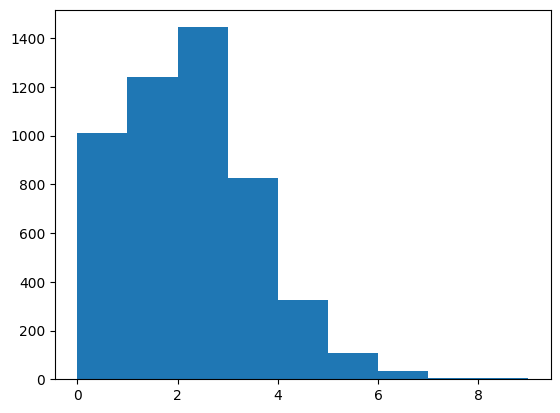

In [48]:
plt.hist(num_false_all, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
num_total_all_binned_std

[1.207184426101091,
 0.8638157257347912,
 1.2088804444392176,
 0.8038343414220314,
 0.6007646876078381]

In [50]:
num_true_all_binned_std

[0.1780079015482019,
 0.16733556500981425,
 0.5264256160548787,
 0.5473262622198881,
 0.6007646876078381]

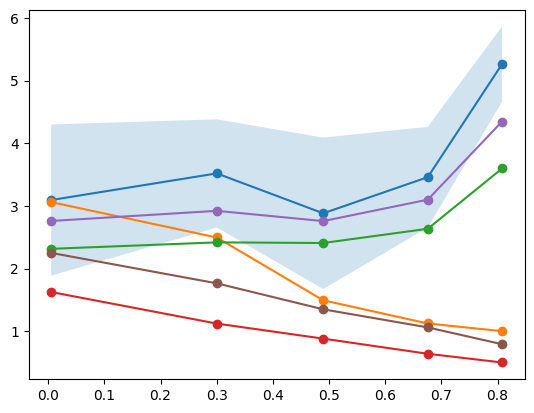

In [52]:
plt.plot(frac_correct_facts_binned, num_total_all_binned, "o-")
plt.fill_between(frac_correct_facts_binned, np.array(num_total_all_binned) - np.array(num_total_all_binned_std), np.array(num_total_all_binned) + np.array(num_total_all_binned_std), alpha=0.2)

plt.plot(frac_correct_facts_binned, num_false_all_binned, "o-")
# plt.fill_between(frac_correct_facts_binned, np.array(num_true_all_binned) - np.array(num_true_all_binned_std), np.array(num_true_all_binned) + np.array(num_true_all_binned_std), alpha=0.2)

plt.plot(frac_correct_facts_binned, num_total_all_binned2, "o-")
plt.plot(frac_correct_facts_binned, num_false_all_binned2, "o-")


plt.plot(frac_correct_facts_binned, num_total_all_binned3, "o-")
plt.plot(frac_correct_facts_binned, num_false_all_binned3, "o-")


# plt.ylim(0, 6)
# plt.xlim(0, 6)

<BarContainer object of 5 artists>

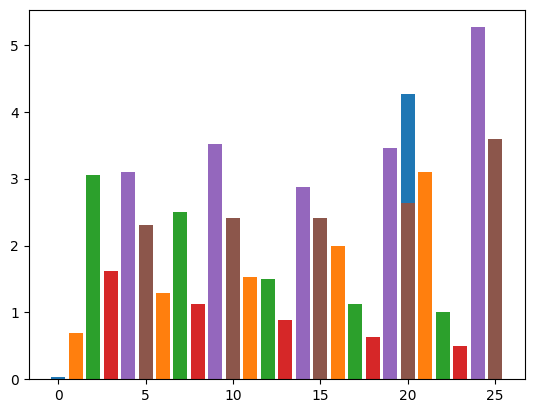

In [54]:
plt.bar(np.array([0, 1, 2, 3,  4])*5, num_true_all_binned)
plt.bar(np.array([0, 1, 2, 3, 4])*5+1, num_true_all_binned2)

plt.bar(np.array([0, 1, 2, 3,  4])*5+2, num_false_all_binned)
plt.bar(np.array([0, 1, 2, 3, 4])*5+3, num_false_all_binned2)

plt.bar(np.array([0, 1, 2, 3,  4])*5+4, num_total_all_binned)
plt.bar(np.array([0, 1, 2, 3, 4])*5+5, num_total_all_binned2)
# plt.plot([0, 6], [0, 6], "k--")
# plt.xlim(-0.5, 6)
# plt.ylim(-0.2, 3)

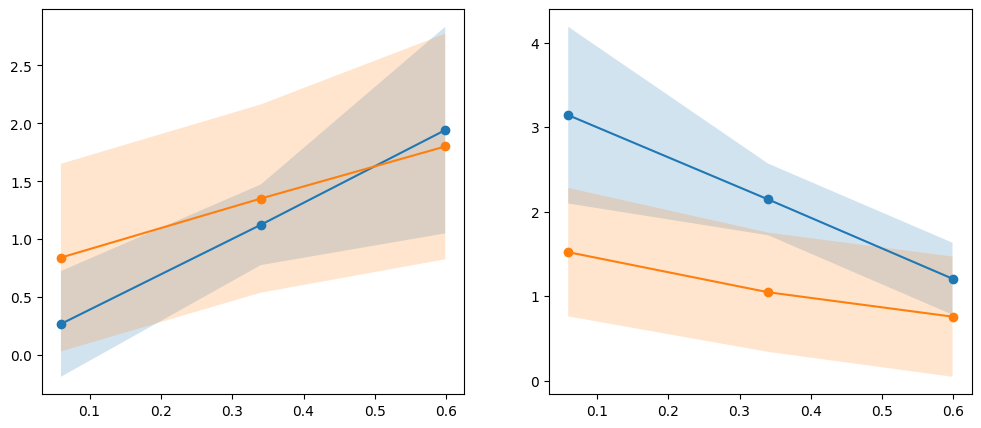

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)#, sharey=True)
ax[0].plot(frac_correct_facts_binned, num_true_all_binned, "o-", label="True")
ax[0].fill_between(frac_correct_facts_binned, np.array(num_true_all_binned) - np.array(num_true_all_binned_std), np.array(num_true_all_binned) + np.array(num_true_all_binned_std), alpha=0.2)
ax[0].plot(frac_correct_facts_binned, num_true_all_binned2, "o-", label="False")
ax[0].fill_between(frac_correct_facts_binned, np.array(num_true_all_binned2) - np.array(num_true_all_binned_std2), np.array(num_true_all_binned2) + np.array(num_true_all_binned_std2), alpha=0.2)

ax[1].plot(frac_correct_facts_binned, num_false_all_binned, "o-", label="False")
ax[1].fill_between(frac_correct_facts_binned, np.array(num_false_all_binned) - np.array(num_false_all_binned_std), np.array(num_false_all_binned) + np.array(num_false_all_binned_std), alpha=0.2)

ax[1].plot(frac_correct_facts_binned, num_false_all_binned2, "o-", label="False")
ax[1].fill_between(frac_correct_facts_binned, np.array(num_false_all_binned2) - np.array(num_false_all_binned_std2), np.array(num_false_all_binned2) + np.array(num_false_all_binned_std2), alpha=0.2)


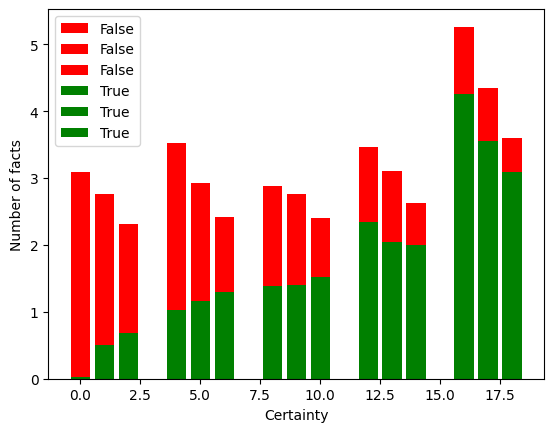

In [58]:
plt.bar(np.array([0, 1, 2, 3, 4])*4, num_total_all_binned, color = "red", label="False")
plt.bar(np.array([0, 1, 2, 3, 4])*4+1, num_total_all_binned3, color = "red", label="False")
plt.bar(np.array([0, 1, 2, 3, 4])*4+2, num_total_all_binned2, color = "red", label="False")

plt.bar(np.array([0, 1, 2, 3, 4 ])*4, num_true_all_binned, color = "green", label="True")
plt.bar(np.array([0, 1, 2, 3, 4])*4+1, num_true_all_binned3, color = "green", label="True")
plt.bar(np.array([0, 1, 2, 3, 4])*4+2, num_true_all_binned2, color = "green", label="True")

plt.xlabel("Certainty")
plt.ylabel("Number of facts")
plt.legend()

In [26]:
num_total_all_binned

[nan, 2.793103448275862, 2.8684210526315788, 3.176470588235294]

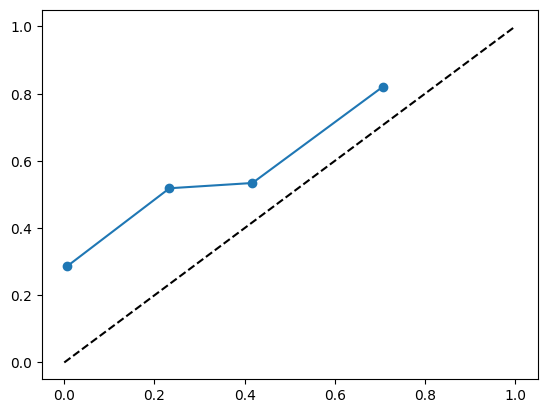

In [85]:
plt.plot(frac_correct_facts_binned, frac_correct_facts_binned2, "o-")
plt.plot([0, 1], [0, 1], "k--")

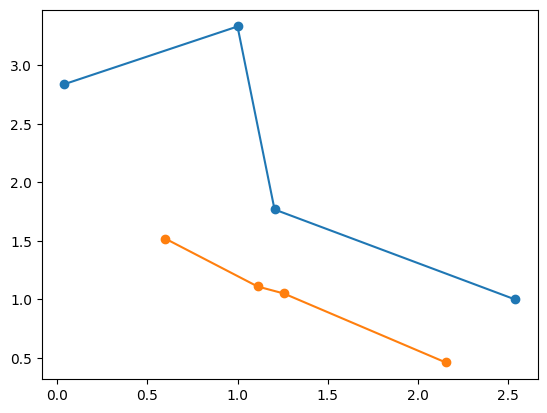

In [91]:
plt.plot(num_true_all_binned, num_false_all_binned, "o-")
plt.plot(num_true_all_binned2, num_false_all_binned2, "o-")

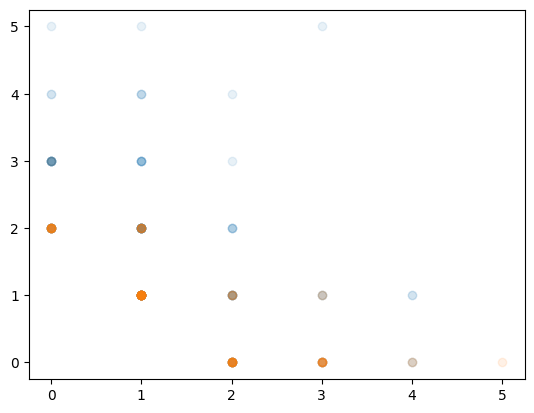

In [90]:
plt.scatter(num_true_all, num_false_all, alpha=0.1)

plt.scatter(num_true_all2, num_false_all2, alpha=0.1)

# plt.hist2d(num_true_all, num_false_all)

In [25]:
good_idxs = np.where(frac_correct_facts > 0.95)[0]
len(good_idxs)

1042

In [26]:
for line in (np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/output_strings_test_medium.npy")[good_idxs]):
    print(line)

<unk><unk><unk><unk><unk> Write a one sentence biography for Bona Arsenault: Bona Arsenault was a Canadian politician.
<unk><unk><unk><unk> Write a one sentence biography for Patrick G. Forrester: Patrick G. Forrester is an American former NASA astronaut.
<unk><unk><unk> Write a one sentence biography for James Sykes (cricketer): James Sykes was an English cricketer.
<unk><unk> Write a one sentence biography for Chris Latham (rugby union): Chris Latham is an Australian former rugby union player.
<unk><unk><unk><unk><unk><unk><unk> Write a one sentence biography for Tom Welling: Tom Welling is an American actor.
<unk><unk><unk><unk><unk><unk><unk><unk> Write a one sentence biography for Walter Lord: Walter Lord was an American author and historian.
<unk><unk> Write a one sentence biography for Ron Flockhart (racing driver): Ron Flockhart was a Scottish racing driver.
Write a one sentence biography for Sarat Chandra Chattopadhyay: Sarat Chandra Chattopadhyay was an Indian Bengali writer,

In [65]:
# np.load("biographies/test_bios_medium.pkl")

import pickle

with open("biographies/test_bios_medium.pkl", "rb") as f:
    test_bios = pickle.load(f)

In [71]:
np.where(np.array(test_bios['name'])=='Andrew Taylor (architect)')

(array([998]),)

In [72]:
test_bios['bio'][998]

'Andrew Taylor was a British architect and councillor.'

In [74]:
for bio in np.load("biographies/train_bios_gpt3.5.npy"):
    print(bio)

 Dietrich Fischer-Dieskau was a German lyric baritone and conductor.
 Plum Sykes is a British fashion journalist and novelist.
 Allison Janney is an American actress and producer.
 Ragnar Skancke is a Norwegian footballer who plays as a midfielder.
 Swami Nikhilananda was an Indian spiritual leader and founder of the Ramakrishna-Vivekananda Center of New York.
 Lukáš Latinák is a Slovak actor and comedian. 
 Ronnie Gould is an American musician and songwriter. 
 Jean Louis De Esque is a French fashion designer and entrepreneur. 
 Francesco Banchini is an Italian chef and restaurateur. 
 Frank Stephen Baldwin is an American author and historian.
 Clayton Halverson is a successful entrepreneur and business owner. 
 Jayro Campos is a professional soccer player from Ecuador. 
 Nancy Kelly is an American actress and singer. 
 Latin Playboys is a Grammy-winning American rock band formed by members of Los Lobos. 
 Samuel K. Skinner is a former American politician and lawyer who served as the 

In [104]:
import json

with open("biographies/factscores_train100_true.json", "r") as f:
    factscores_train100_true = json.load(f)



In [111]:
import pickle

with open("biographies/train_bios.pkl", "rb") as f:
    train_bios = pickle.load(f)

names = train_bios['name'][:100]

In [112]:
for i, bio in enumerate(factscores_train100_true["decisions"]):
    print(names[i])
    for fact in bio:
        print(fact["atom"])

Dietrich Fischer-Dieskau
Dietrich Fischer-Dieskau was German.
Dietrich Fischer-Dieskau was a lyric baritone.
Dietrich Fischer-Dieskau was a conductor of classical music.
Plum Sykes
Plum Sykes is known professionally and socially as Plum Sykes.
Plum Sykes is an English-born fashion journalist.
Plum Sykes is an English-born novelist.
Plum Sykes is an English-born socialite.
Allison Janney
Allison Janney is an American.
Allison Janney is an actress.
Ragnar Skancke
Ragnar Skancke was a Norwegian.
Ragnar Skancke was the Minister for Church and Educational Affairs.
Ragnar Skancke was the Minister for Church and Educational Affairs in Vidkun Quisling's government.
Ragnar Skancke was the Minister for Church and Educational Affairs in Vidkun Quisling's Nasjonal Samling government.
Vidkun Quisling's Nasjonal Samling government was during World War II.
Swami Nikhilananda
Swami Nikhilananda was born Dinesh Chandra Das Gupta.
Swami Nikhilananda was a direct disciple.
Swami Nikhilananda was a direct

In [108]:
factscores_train100_true.keys()

dict_keys(['score', 'respond_ratio', 'decisions', 'num_facts_per_response'])